## 🐟 FDA Seafood Import Refusal Analysis (2001–2025)
**Author:** Md Shafin Ahamed (Supply Chain Data Analyst | Food Tech)

### 🎯 Objective
To analyze 25 years of U.S. FDA import refusal data to identify supply chain vulnerabilities in the Asian Seafood sector.
**Hypothesis:** Recent regulatory crackdowns in Southeast Asia (Indonesia/Vietnam) have created a market gap for stable exporters like Bangladesh.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

TARGET_COUNTRIES = ['Indonesia', 'Vietnam', 'China', 'Bangladesh']

In [8]:
df = pd.read_csv('food_refusals_complete.csv', encoding='ISO-8859-1', low_memory=False)

# 1. Filter for Seafood only
df_sea = df[df['Product_category'] == 'Fishery/Seafood'].copy()

# 2. Filter for Target Countries
df_sea = df_sea[df_sea['Country'].isin(TARGET_COUNTRIES)]

# 3. Date Formatting
df_sea['Refused Date'] = pd.to_datetime(df_sea['Refused Date'])
df_sea['Year'] = df_sea['Refused Date'].dt.year

print(f"Total Seafood Records Analyzed: {len(df_sea)}")
df_sea.head()

Total Seafood Records Analyzed: 16194


,FEI Number,Firm Legal Name,Firm Address,Product Code and Description,Refused Date,Import Division,Shipment ID,FDA Sample Analysis,Private Lab Analysis,Refusal Charges,Date,Product_code,Year,Product_category,Country,Reason,Reason_clean
0,3004347297,STAPIMEX,"District 7, 220, National Road 1a Wardtown, So...","16XGT21 \ SHRIMP AND PRAWNS, AQUACULTURE HARVE...",2025-11-20,Division of Southeast Imports (DSEI),082-0466421-6/10002/1,Yes,No,3885,2025-11-20,16.0,2025,Fishery/Seafood,Vietnam,POIS CHLOR,Other
108,3008270878,PT. Bahari Makmur Sejati,"Utama Modern Industri AA 1, , Serang, Banten, ...","16XGD21 \ SHRIMP AND PRAWNS, AQUACULTURE HARVE...",2025-11-19,Division of Southeast Imports (DSEI),AQZ-0625354-9/10002/1,Yes,No,3821,2025-11-19,16.0,2025,Fishery/Seafood,Indonesia,MFR INJ,Other
115,3017911474,"Ningde Wanxing Food Co.,Ltd.","No. 25 Jiaocheng District, Tangtian, Meitian V...",16AGD13 \ CROAKER,2025-11-19,Division of Northern Border Imports (DNBI),349-2071586-8/14/1,Yes,No,2860,2025-11-19,16.0,2025,Fishery/Seafood,China,VETDRUGRES,Chemical
243,3014548309,"SEA WEALTH VN CO., LTD","78-80 Phuoc Thang St., Ward 12, , Vung Tau, Ba...",16AGH56 \ FILEFISH,2025-11-17,Division of West Coast Imports (DWCI),U47-2512718-5/10002/1,No,Yes,9,2025-11-17,16.0,2025,Fishery/Seafood,Vietnam,SALMONELLA,Biological
245,3010477794,"Zhong Yi Seafood Co., Ltd","325 National Road, Lianbei Town, , Guangxi, , ...","16XGD07 \ POMPANO (PERMIT, POMPANITO) AQUACULT...",2025-11-14,Division of West Coast Imports (DWCI),NGK-2503040-2/10004/1,No,No,3600,2025-11-14,16.0,2025,Fishery/Seafood,China,REFUSE EI,Other


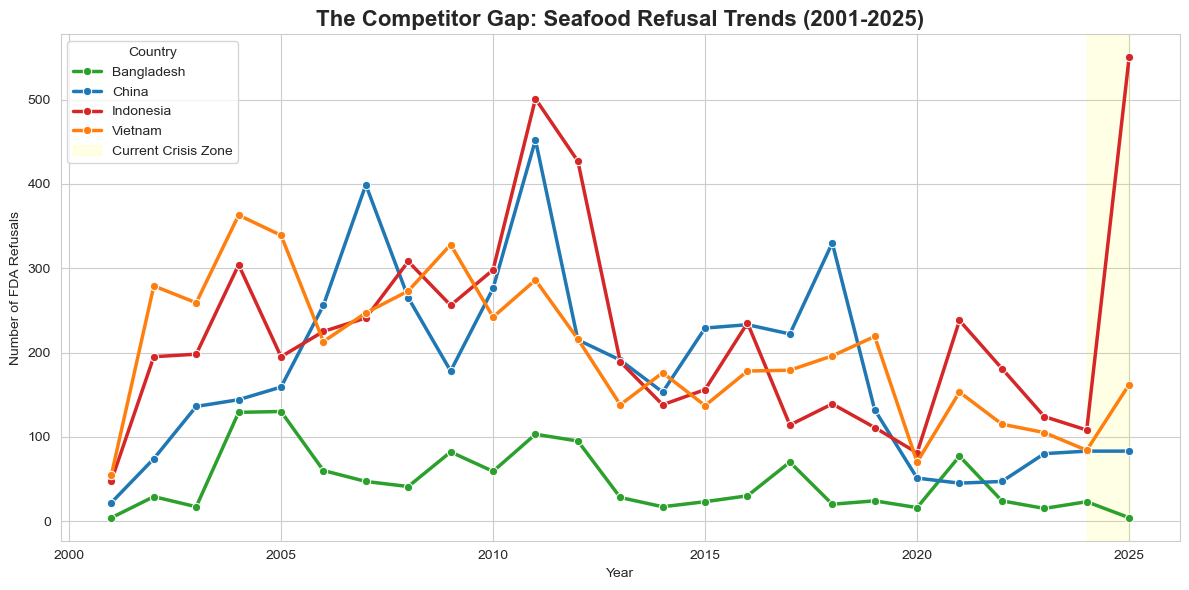

In [15]:
# Aggregate Data
trend_data = df_sea.groupby(['Year', 'Country']).size().reset_index(name='Refusal_Count')

# Plotting
plt.figure(figsize=(12, 6))
custom_colors = {'Indonesia': '#d62728', 'Vietnam': '#ff7f0e', 'Bangladesh': '#2ca02c', 'China': '#1f77b4'}

sns.lineplot(data=trend_data, x='Year', y='Refusal_Count', hue='Country', palette=custom_colors, marker='o', linewidth=2.5)

# Highlight the 2024-2025 Crisis Zone
plt.axvspan(2024, 2025, color='yellow', alpha=0.1, label='Current Crisis Zone')

plt.title('The Competitor Gap: Seafood Refusal Trends (2001-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of FDA Refusals')
plt.legend(title='Country')
plt.tight_layout()
plt.savefig('The_Competitor_Gap.png', dpi = 300 )
plt.show()

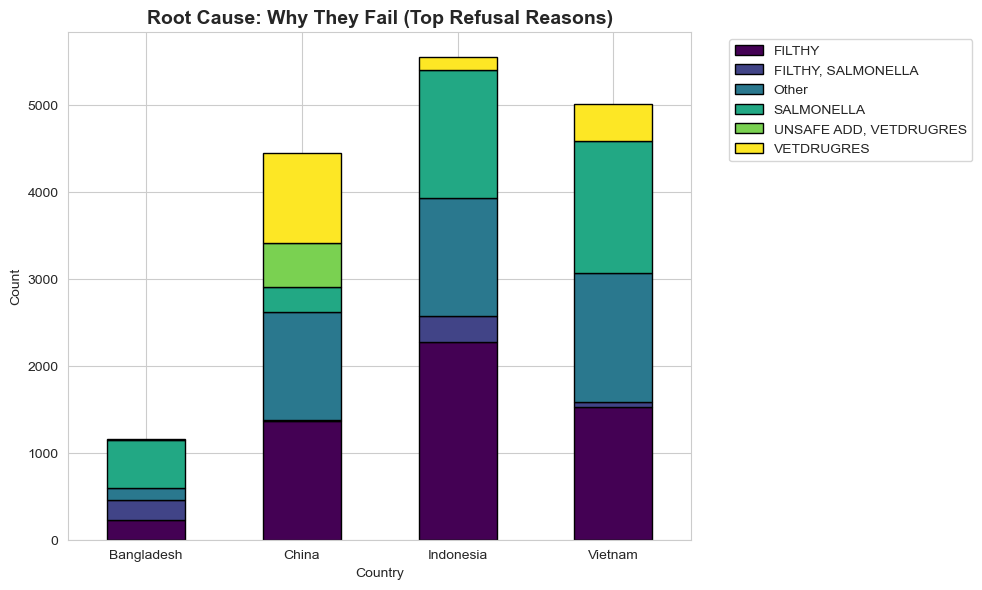

In [16]:
# Identify Top Charges
top_charges = df_sea['Reason'].value_counts().nlargest(5).index
df_sea['Clean_Charge'] = df_sea['Reason'].apply(lambda x: x if x in top_charges else 'Other')

# Pivot & Plot
charge_counts = df_sea.groupby(['Country', 'Clean_Charge']).size().unstack(fill_value=0)
charge_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6), edgecolor='black')

plt.title('Root Cause: Why They Fail (Top Refusal Reasons)', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Root_Cause.png', dpi = 300 )
plt.show()

In [14]:
# Calculate % of refusals without Lab Analysis 
dwpe_stats = df_sea.groupby('Country')['FDA Sample Analysis'].value_counts(normalize=True).unstack().fillna(0)
dwpe_stats['No_Analysis_Pct'] = dwpe_stats['No'] * 100

print("Percentage of Refusals WITHOUT Lab Testing (Indicator of 'Red List' Status):")
print(dwpe_stats[['No_Analysis_Pct']].sort_values(by='No_Analysis_Pct', ascending=False ).round(2)
     )

Percentage of Refusals WITHOUT Lab Testing (Indicator of 'Red List' Status):
FDA Sample Analysis  No_Analysis_Pct
Country                             
Bangladesh                     81.23
Indonesia                      76.10
Vietnam                        64.96
China                          61.62


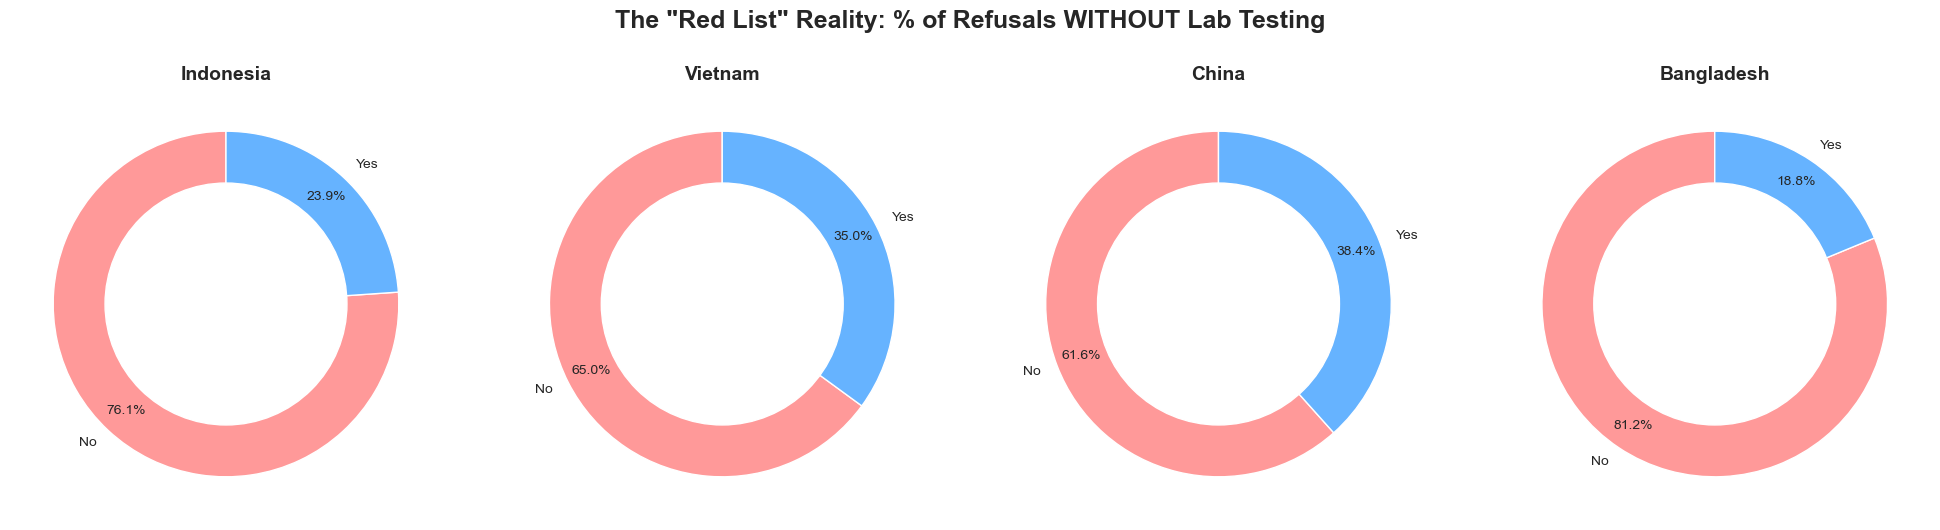

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('The "Red List" Reality: % of Refusals WITHOUT Lab Testing', fontsize=18, fontweight='bold', y=1.05)

colors = ['#ff9999', '#66b3ff'] # Red for No (Untested/Blocked), Blue for Yes (Tested)

for i, country in enumerate(TARGET_COUNTRIES):
    country_data = df_sea[df_sea['Country'] == country]
    dwpe_counts = country_data['FDA Sample Analysis'].value_counts()
    
    # Donut Chart
    axes[i].pie(dwpe_counts, labels=dwpe_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)
    axes[i].set_title(f'{country}', fontsize=14, fontweight='bold')
    
    # Draw circle for Donut effect
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)

plt.tight_layout()
plt.savefig('DWPE_Analysis.png', dpi=300)
plt.show()